<a href="https://colab.research.google.com/github/raka-raprast/churn-prediction/blob/main/Customer_Churn_Prediction_Raka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction
---
By: Raka Ramadhani Aulia Prasetyo

Dataset: [Telco customer churn: IBM dataset](https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset)

## Load and Assign Data

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakaraprasetyo","key":"168203d666b12e693dc4b5eff3380a06"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 87.8MB/s]


In [7]:
!unzip telco-customer-churn-ibm-dataset.zip

Archive:  telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


In [8]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns

## Data Preprocessing

### General Information

In [9]:
# Read xlsx as dataset, convert the dataset into csv and sample 10 data
dataset = pd.read_excel('Telco_customer_churn.xlsx')
dataset.to_csv (r'telco_customer_churn.csv', index = None, header=True)
df = pd.read_csv('telco_customer_churn.csv')
df.sample(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1048,2860-RANUS,1,United States,California,Mc Kittrick,93251,"35.38381, -119.730885",35.383810,-119.730885,Female,Yes,No,No,20,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.80,1727.5,Yes,1,75,3336,Price too high
5753,4560-WQAQW,1,United States,California,Mount Laguna,91948,"32.830852, -116.444601",32.830852,-116.444601,Female,No,No,No,59,Yes,Yes,DSL,Yes,No,No,Yes,No,Yes,One year,No,Bank transfer (automatic),68.70,4070.95,No,0,29,4244,NaN
6481,2946-KIQSP,1,United States,California,Crescent City,95531,"41.701223, -124.003393",41.701223,-124.003393,Female,No,No,No,35,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,33.45,1175.85,No,0,66,2553,NaN
5506,5966-EMAZU,1,United States,California,Fort Bidwell,96112,"41.932207, -120.135941",41.932207,-120.135941,Male,No,Yes,No,64,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,108.50,6880.85,No,0,22,4576,NaN
1565,4192-GORJT,1,United States,California,Fremont,94555,"37.555473, -122.080312",37.555473,-122.080312,Male,No,Yes,No,5,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,498.1,Yes,1,77,4580,Service dissatisfaction
574,8699-ASUFO,1,United States,California,Nuevo,92567,"33.82769, -117.102244",33.827690,-117.102244,Male,Yes,Yes,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,527.9,Yes,1,96,4969,Attitude of service provider
6334,6013-BHCAW,1,United States,California,San Jose,95117,"37.311088, -121.961786",37.311088,-121.961786,Male,No,Yes,Yes,61,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),81.00,4976.15,No,0,40,4151,NaN
2743,3164-YAXFY,1,United States,California,Coulterville,95311,"37.722127, -120.110174",37.722127,-120.110174,Male,No,No,No,57,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,53.75,3196,No,0,58,5594,NaN
6128,8661-BOYNW,1,United States,California,Tollhouse,93667,"36.993666, -119.348267",36.993666,-119.348267,Female,No,Yes,No,72,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),84.40,6096.45,No,0,44,5046,NaN
5411,3892-NXAZG,1,United States,California,Downieville,95936,"39.578792, -120.780786",39.578792,-120.780786,Male,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8289.2,No,0,72,6254,NaN


In [10]:
# Gather general data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Column Explanation

* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner: Indicate if the customer has a partner: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

### Data Cleaning

In [11]:
# Simplify column name
df.columns = ['customer_id', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure_month', 'phone_service', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_reason']

In [12]:
# Drop a column that cannot be processed
df = df.drop(['customer_id', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude'], axis = 1)
df.sample(5)

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
1660,Male,No,No,No,26,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.95,2254.2,Yes,1,85,5869,Competitor offered higher download speeds
5386,Male,No,No,No,37,No,No phone service,DSL,No,No,No,No,Yes,No,Two year,No,Credit card (automatic),35.80,1316.9,No,0,68,5658,NaN
5734,Male,No,No,No,41,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,89.55,3729.75,No,0,66,5549,NaN
4061,Male,No,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,113.75,6561.25,No,0,23,6251,NaN
6357,Female,Yes,No,No,69,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),110.25,7467.55,No,0,69,4948,NaN


#### Converting Data Types

In [13]:
# Changing NaN to new category
df[['churn_reason']] = df[['churn_reason']].fillna('Not Churn')

In [14]:
# Converting total_charges to float64
df['total_charges'] = df['total_charges'].replace(' ', np.nan)
df['total_charges'] = df['total_charges'].astype('float64')

In [15]:
# Convert the Data that has a relation to category
df["internet_service"] = df["internet_service"].astype('category')
df["gender"] = df["gender"].astype('category')
df["contract"] = df["contract"].astype('category')
df["payment_method"] = df["payment_method"].astype('category')
df['senior_citizen'] = df['senior_citizen'].astype('category')
df['partner'] = df['partner'].astype('category')
df['dependents'] = df['dependents'].astype('category')
df['multiple_line'] = df['multiple_line'].astype('category')
df['online_security'] = df['online_security'].astype('category')
df['online_backup'] = df['online_backup'].astype('category')
df['device_protection'] = df['device_protection'].astype('category')
df['tech_support'] = df['tech_support'].astype('category')
df['streaming_tv'] = df['streaming_tv'].astype('category')
df['streaming_movies'] = df['streaming_movies'].astype('category')
df['paperless_billing'] = df['paperless_billing'].astype('category')
df['churn_reason'] = df['churn_reason'].astype('category')
df['churn_label'] = df['churn_label'].astype('category')
df['phone_service'] = df['phone_service'].astype('category')

In [16]:
df.dtypes

gender               category
senior_citizen       category
partner              category
dependents           category
tenure_month            int64
phone_service        category
multiple_line        category
internet_service     category
online_security      category
online_backup        category
device_protection    category
tech_support         category
streaming_tv         category
streaming_movies     category
contract             category
paperless_billing    category
payment_method       category
monthly_charges       float64
total_charges         float64
churn_label          category
churn_value             int64
churn_score             int64
cltv                    int64
churn_reason         category
dtype: object

Understanding:
* NaN in churn_reason assigned as a "Not Churn" because churn_value shown 0 or churn_label value is "No" means the NaN appears Not Churn
* The total_charges can't be converted to float and error appears said the string couldn't be convert to float assuming that there is blank space that needed to be converted to NaN

#### Handling Missing Data

In [17]:
df.isnull().sum()

gender                0
senior_citizen        0
partner               0
dependents            0
tenure_month          0
phone_service         0
multiple_line         0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn_label           0
churn_value           0
churn_score           0
cltv                  0
churn_reason          0
dtype: int64

In [18]:
df.dropna(subset = ["total_charges"], inplace=True)

Understanding:
* The missing data from total_charges are the blank space that converted to NaN

#### Checking Outliers

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

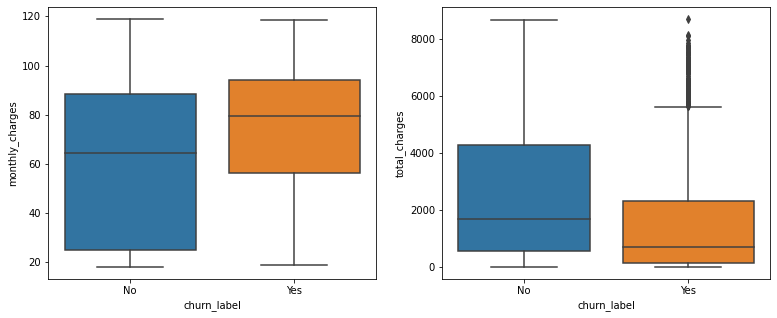

In [20]:
# check outlier via boxplot
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,2)
sns.boxplot(x='churn_label',y='monthly_charges',data=df,ax=ax1)
ax2 = fig.add_subplot(1,3,3)
sns.boxplot(x='churn_label',y='total_charges',data=df,ax=ax2)
plt.show()

Understanding:
* outliers in total_charges are understandable as it still in a safe range

#### Transforming Data

In [21]:
print('Minimum Tenure : ', df['tenure_month'].min())
print('Maximum Tenure : ', df['tenure_month'].max())

Minimum Tenure :  1
Maximum Tenure :  72


In [22]:
df_viz = df.copy()

In [23]:
bins= [0,12,24,36,48, 60, 73]
labels = ['1st Year','2nd Year','3rd Year','4th Year','5th Year','6th Year']
df_viz['annual_tenure'] = pd.cut(df_viz['tenure_month'], bins=bins, labels=labels, right=False)

In [24]:
df_viz

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason,annual_tenure
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1st Year
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,1st Year
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,1st Year
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,3rd Year
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,5th Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,Not Churn,6th Year
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,Not Churn,3rd Year
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,Not Churn,6th Year
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,Not Churn,1st Year


Understanding:
* The tenure month are transformed into a new column data to help visualize about the annual tenure.

## Exploratory Data Analysis

### Statistical Summary

In [25]:
# check summary statistics
df.describe().round(2)

,tenure_month,monthly_charges,total_charges,churn_value,churn_score,cltv
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30,0.27,58.72,4401.45
std,24.55,30.09,2266.77,0.44,21.53,1182.41
min,1.00,18.25,18.80,0.00,5.00,2003.00
25%,9.00,35.59,401.45,0.00,40.00,3469.75
50%,29.00,70.35,1397.48,0.00,61.00,4527.50
75%,55.00,89.86,3794.74,1.00,75.00,5381.00
max,72.00,118.75,8684.80,1.00,100.00,6500.00


Understanding:
* The longer the Tenure the larger the charges the customer spent
* Churn Value q1,q2 and q3 doesn't represent anything since the data only between 0 and 1

### Categorical Variable
The Exploratory Data Analysis within variable are using a real data set as it represent the whole real data

#### Gender

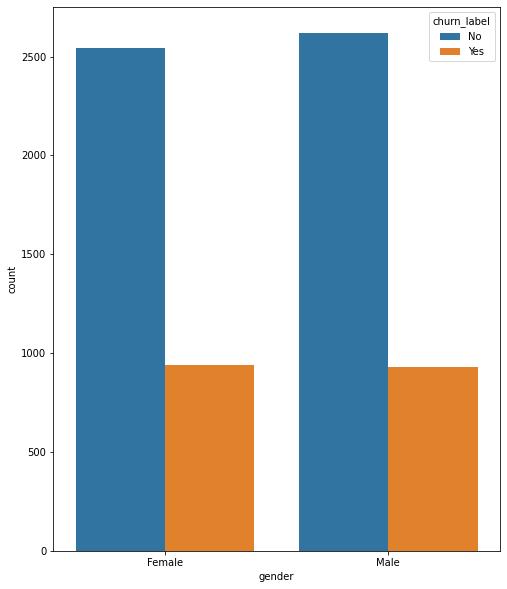

In [26]:
plt.figure(figsize=(8,10))
sns.countplot(data=df,x ='gender',hue = 'churn_label')

Understanding:
* Both female and male has a similar result on churn.

#### Senior Citizen

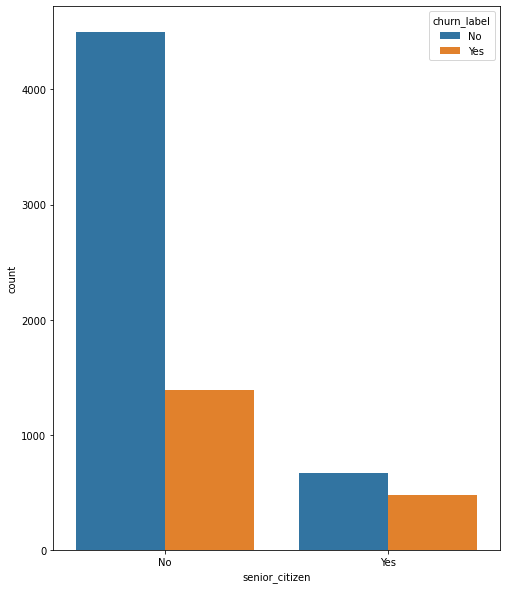

In [27]:
plt.figure(figsize=(8,10))
sns.countplot(data=df,x ='senior_citizen',hue = 'churn_label')

Understanding:
* Customer who are senior citizen are less likely to churn than the non senior citizen

#### Partner

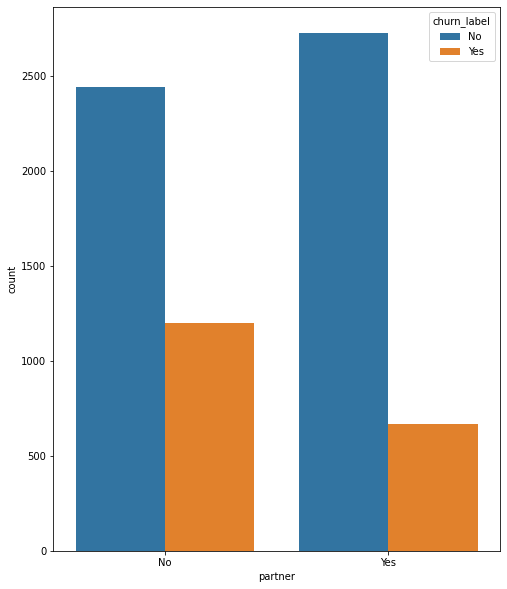

In [28]:
plt.figure(figsize=(8,10))
sns.countplot(data=df,x ='partner',hue = 'churn_label')

Understanding:
* Customer who have a partner are less likely to churn than the other who doesn't have.

#### Dependents

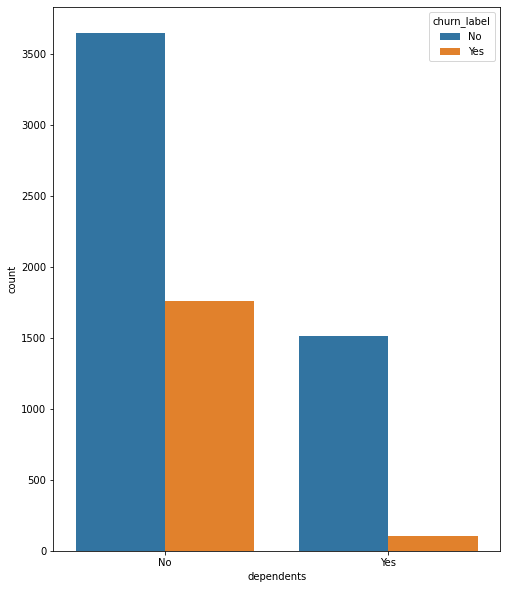

In [29]:
plt.figure(figsize=(8,10))
sns.countplot(data=df,x ='dependents',hue = 'churn_label')

Understanding:
* Customer who live with their dependents are less likely to churn than who don't

#### Payment Method

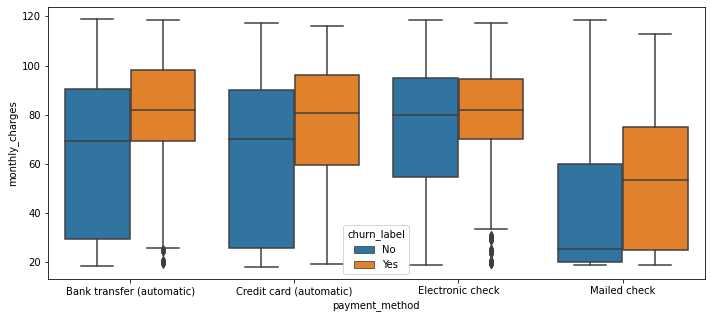

In [30]:
# check outlier via boxplot
fig=plt.figure(figsize=(40,5))
ax3=fig.add_subplot(1,3,2)
sns.boxplot(x='payment_method',y='monthly_charges',data=df,ax=ax3,hue='churn_label')
plt.show()

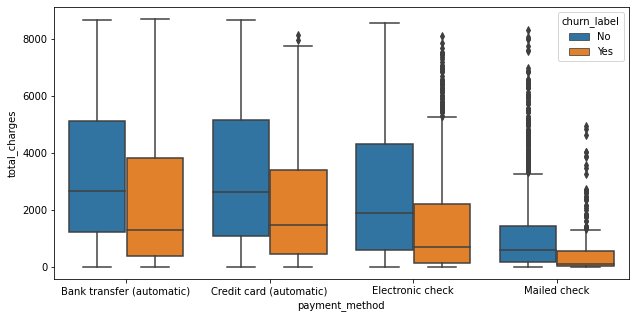

In [31]:
# check outlier via boxplot
fig=plt.figure(figsize=(35,5))
ax4=fig.add_subplot(1,3,3)
sns.boxplot(x='payment_method',y='total_charges',data=df,ax=ax4,hue='churn_label')
plt.show()

Electronic Check: 2365
Mailed Check: 1604
Bank Transfer: 1542
Credit Card: 1521


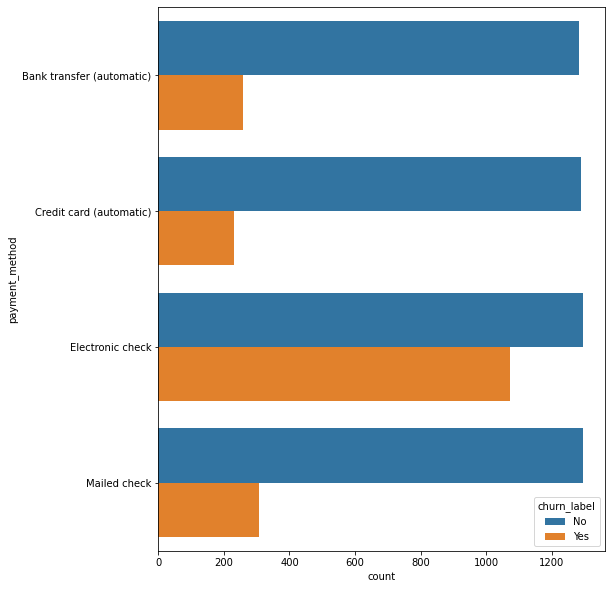

In [32]:
pay_count = df.payment_method.value_counts()
print('Electronic Check:', pay_count[0])
print('Mailed Check:', pay_count[1])
print('Bank Transfer:', pay_count[2])
print('Credit Card:', pay_count[3])
plt.figure(figsize=(8,10))
sns.countplot(data=df,y='payment_method',hue = 'churn_label')

Understanding:
* Customer who use Electronic check has bigger chance to churn than the other payment method

#### Contract

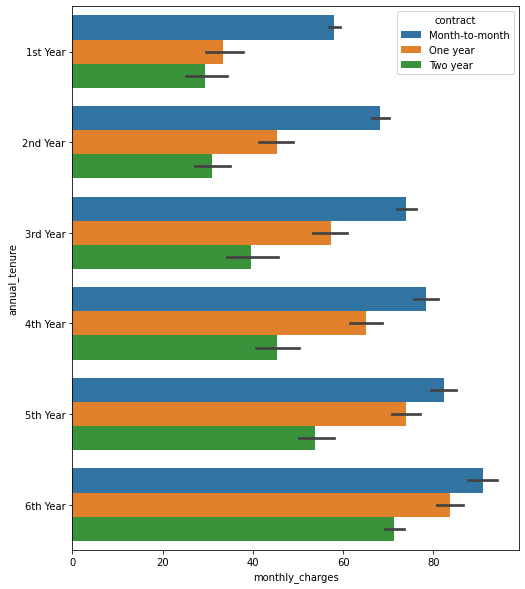

In [33]:
plt.figure(figsize=(8,10))
sns.barplot(data=df_viz,x='monthly_charges',y='annual_tenure',hue='contract')

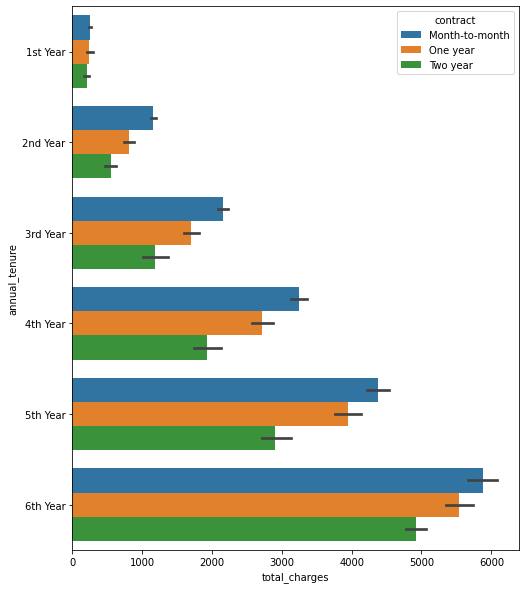

In [34]:
plt.figure(figsize=(8,10))
sns.barplot(data=df_viz,x='total_charges',y='annual_tenure',hue='contract')

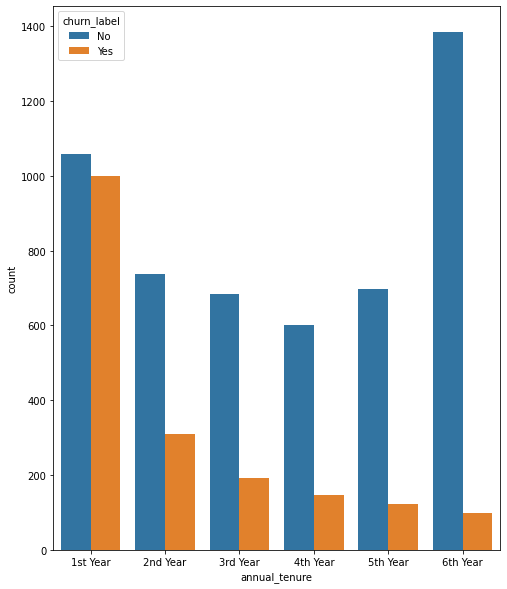

In [35]:
plt.figure(figsize=(8,10))
sns.countplot(data=df_viz,x='annual_tenure',hue='churn_label')

Understanding:
* Total Charges and Monthly Charges steadily increase each years and it is fairly normal.
* Customer tend to churn more on their first year.

#### Churn Reason

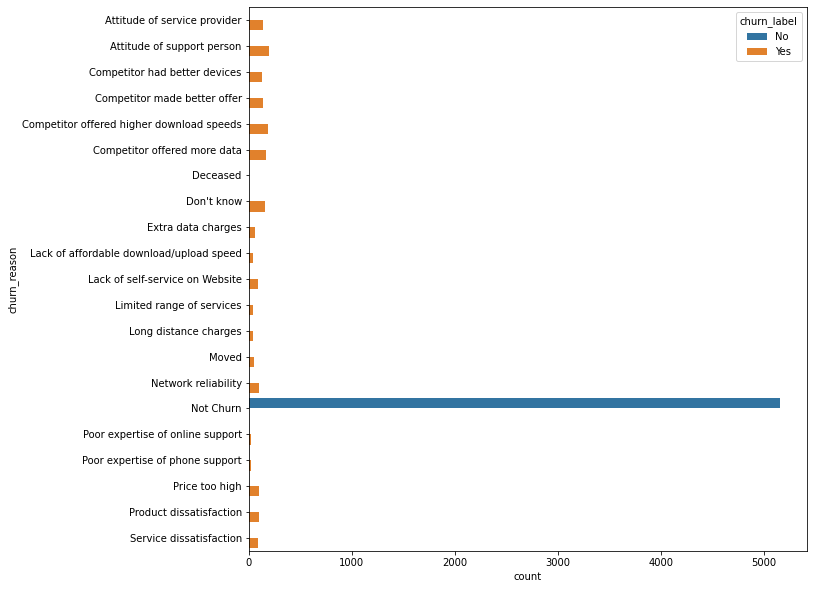

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,y='churn_reason',hue = 'churn_label')

Understanding:
* The data on churn_reason column are imbalance and can cause a disruption on model since churn_label 'yes' data are scattered on to many different label while churn_label 'no' are stacked into one label

#### Additional Service

In [37]:
add_service=['phone_service','multiple_line','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','internet_service']
def service_plot(n,a):
  fig = plt.figure(figsize=(8,10))
  axn = fig.add_subplot(2,1,a)
  sns.barplot(data=df_viz,y='churn_value',x='annual_tenure',hue=add_service[n],ax=axn)

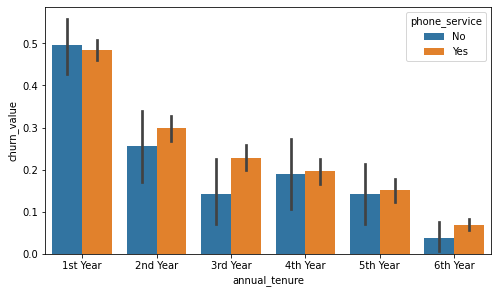

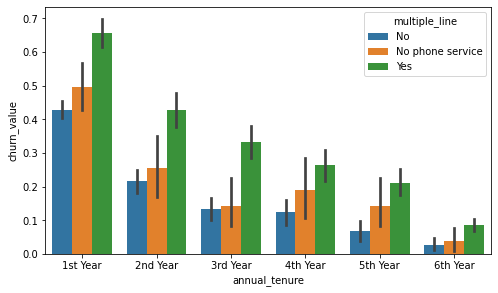

In [38]:
service_plot(0,1)
service_plot(1,1)

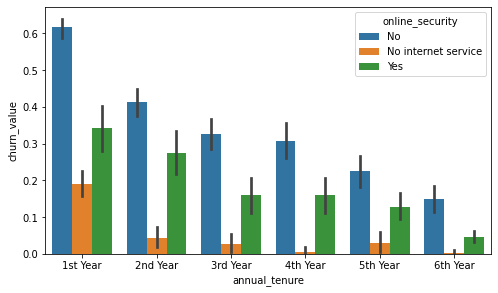

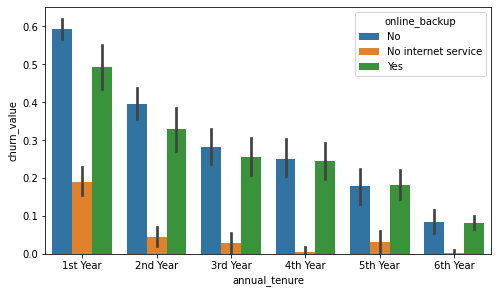

In [39]:
service_plot(2,1)
service_plot(3,1)

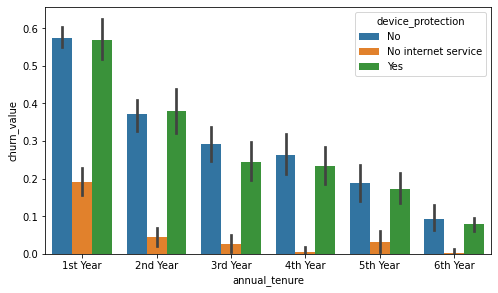

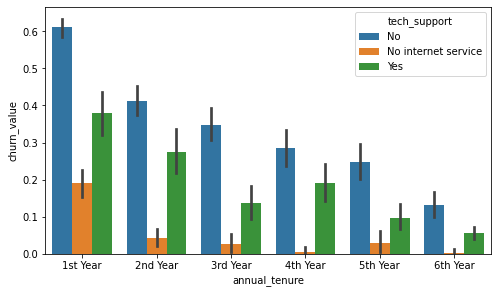

In [40]:
service_plot(4,1)
service_plot(5,1)

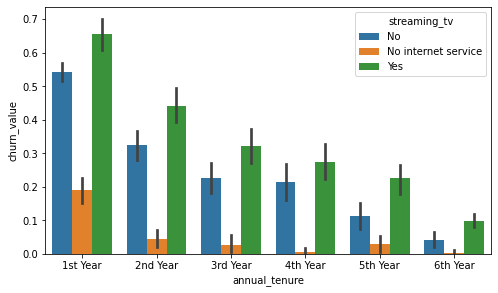

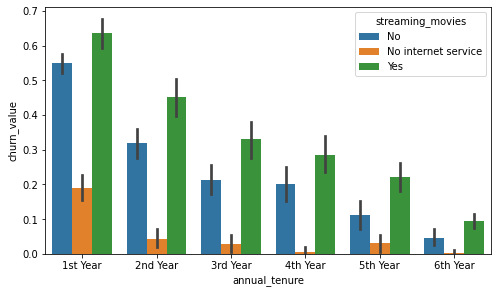

In [41]:
service_plot(6,1)
service_plot(7,1)

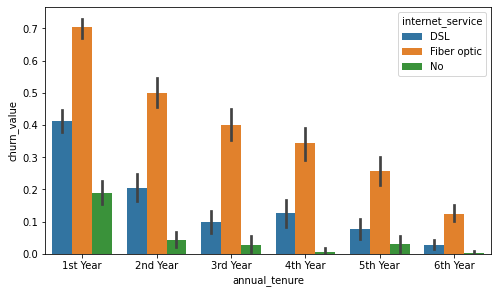

In [42]:
service_plot(8,1)

Understanding:
* Customer with no internet related service has a higher churn value than a customer who does have.
* Customer who use Fiber Optic as their Internet Service has a highest Churn Value than a customer who use DSL and a customer who doesn't use Internet Service.
* Customer who subscribe for a streaming related service has a highest Churn Value than the other who don't
* 1st year of Annual Tenure have a highest Churn Value.

#### Numeric Variable

In [43]:
numeric_df = df.drop(['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn_reason', 'churn_label'], axis = 1)

In [44]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure_month     7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
 3   churn_value      7032 non-null   int64  
 4   churn_score      7032 non-null   int64  
 5   cltv             7032 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 704.6 KB


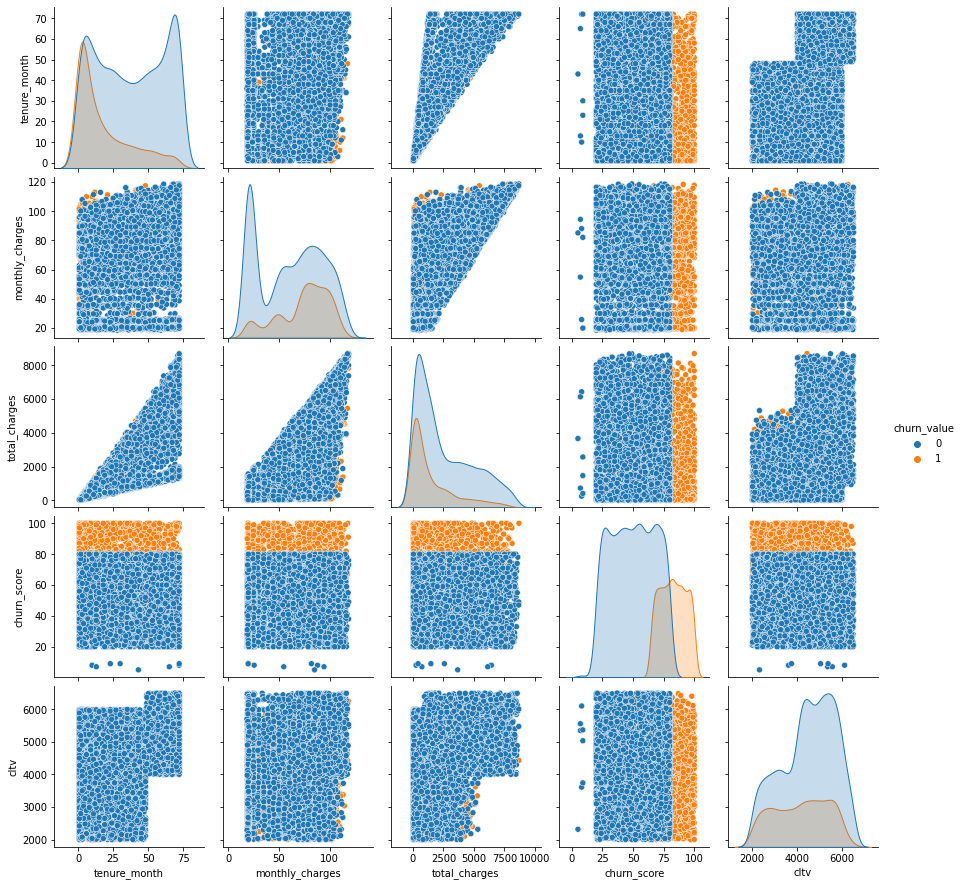

In [45]:
sns.pairplot(hue="churn_value",data=numeric_df)

Understanding:
* Monthly Charge and Total Charge to churn distribution are fairly normal as it is constantly always go up.
* Churn score prediction for churn distribution started on 50 up to 100
* Churn score to Tenure Month, Monthly Charges, and Total Charges showing a similar result

### Random Undersampling

Class 0: 5163
Class 1: 1869
Proportion: 2.76 : 1


Text(0.5, 1.0, 'Count (Churn)')

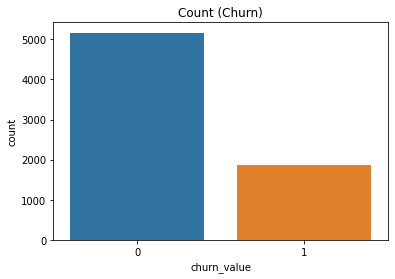

In [46]:
# Checking imbalance data
target_count = df.churn_value.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
sns.countplot(data=df,x='churn_value')
plt.title('Count (Churn)')

In [47]:
# Class count
count_class_0, count_class_1 = df.churn_value.value_counts()

# Divide by class
df_class_0 = df[df['churn_value'] == 0]
df_class_1 = df[df['churn_value'] == 1]

In [48]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
1    1869
0    1869
Name: churn_value, dtype: int64


Text(0.5, 1.0, 'Count (Churn)')

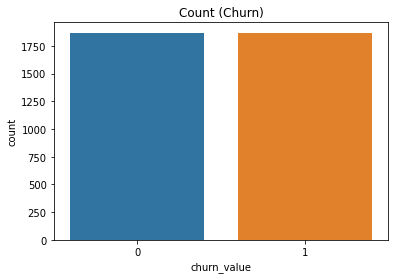

In [49]:
print('Random under-sampling:')
print(df_under.churn_value.value_counts())

sns.countplot(data=df_under,x='churn_value')
plt.title('Count (Churn)')

Understanding:
* The data is imbalance as shown from the proportion above it's 2.76 : 1
* The imbalance data problem handled by doing a Random Oversampling

### Features Correlation

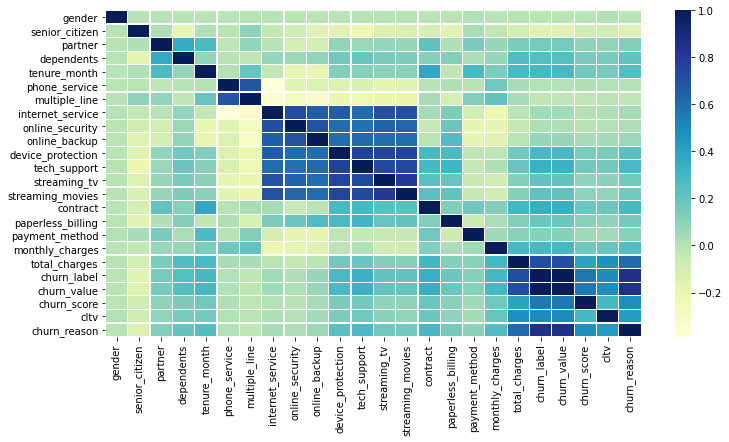

In [50]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.2,cmap='YlGnBu', fmt='g')

Understanding:
* There is many multicolinearity between variable
* churn_value and churn_label has the same value that's what makes them related to each other

## Churn Prediction

### Initialization

In [60]:
import warnings
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
dfn=df_under.copy()

In [52]:
dfn

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
3427,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No,0,38,4845,Not Churn
6532,Female,No,Yes,Yes,55,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,No,Mailed check,100.90,5448.60,No,0,55,6153,Not Churn
4934,Male,No,Yes,Yes,39,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.20,987.95,No,0,65,5453,Not Churn
6351,Male,No,No,No,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1252.85,No,0,48,4565,Not Churn
5078,Female,No,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,150.60,No,0,52,3098,Not Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Male,No,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,1,69,4581,Competitor offered higher download speeds
1865,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,87,2029,Competitor offered higher download speeds
1866,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1,97,5571,Competitor offered higher download speeds
1867,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,70,5620,Competitor offered more data


In [53]:
dfn.dtypes

gender               category
senior_citizen       category
partner              category
dependents           category
tenure_month            int64
phone_service        category
multiple_line        category
internet_service     category
online_security      category
online_backup        category
device_protection    category
tech_support         category
streaming_tv         category
streaming_movies     category
contract             category
paperless_billing    category
payment_method       category
monthly_charges       float64
total_charges         float64
churn_label          category
churn_value             int64
churn_score             int64
cltv                    int64
churn_reason         category
dtype: object

In [54]:
dfn['senior_citizen'] = dfn['senior_citizen'].map(
                   {'Yes':1 ,'No':0})
dfn['gender'] = dfn['gender'].map(
                   {'Female':0 ,'Male':1})
dfn['partner'] = dfn['partner'].map(
                   {'Yes':1 ,'No':0})
dfn['phone_service'] = dfn['phone_service'].map(
                   {'Yes':1 ,'No':0})
dfn['dependents'] = dfn['dependents'].map(
                   {'Yes':1 ,'No':0})
dfn['multiple_line'] = dfn['multiple_line'].map(
                   {'Yes':1 ,'No':0, 'No phone service':2})
dfn['online_security'] = dfn['online_security'].map(
                   {'Yes':1 ,'No':0, 'No internet service':2})
dfn['online_backup'] = dfn['online_backup'].map(
                   {'Yes':1 ,'No':0, 'No internet service':2})
dfn['device_protection'] = dfn['device_protection'].map(
                   {'Yes':1 ,'No':0, 'No internet service':2})
dfn['tech_support'] = dfn['tech_support'].map(
                   {'Yes':1 ,'No':0, 'No internet service':2})
dfn['streaming_tv'] = dfn['streaming_tv'].map(
                   {'Yes':1 ,'No':0, 'No internet service':2})
dfn['streaming_movies'] = dfn['streaming_movies'].map(
                   {'Yes':1 ,'No':0, 'No internet service':2})
dfn['paperless_billing'] = dfn['paperless_billing'].map(
                   {'Yes':1 ,'No':0})
dfn['churn_label'] = dfn['churn_label'].map(
                   {'Yes':1 ,'No':0})

In [55]:
dfn['senior_citizen'] = dfn['senior_citizen'].cat.codes
dfn['partner'] = dfn['partner'].cat.codes
dfn['phone_service'] = dfn['phone_service'].cat.codes
dfn['dependents'] = dfn['dependents'].cat.codes
dfn['paperless_billing'] = dfn['paperless_billing'].cat.codes
dfn["internet_service"] = dfn["internet_service"].cat.codes
dfn["contract"] = dfn["contract"].cat.codes
dfn["payment_method"] = dfn["payment_method"].cat.codes
dfn["churn_reason"] = dfn["churn_reason"].cat.codes

In [56]:
dfn["multiple_line"] = dfn["multiple_line"].astype('int')
dfn["gender"] = dfn["gender"].astype('int')
dfn["online_security"] = dfn["online_security"].astype('int')
dfn["online_backup"] = dfn["online_backup"].astype('int')
dfn['device_protection'] = dfn['device_protection'].astype('int')
dfn['tech_support'] = dfn['tech_support'].astype('int')
dfn['streaming_tv'] = dfn['streaming_tv'].astype('int')
dfn['streaming_movies'] = dfn['streaming_movies'].astype('int')
dfn['churn_label'] = dfn['churn_label'].astype('int')

In [57]:
dfn.dtypes

gender                 int64
senior_citizen          int8
partner                 int8
dependents              int8
tenure_month           int64
phone_service           int8
multiple_line          int64
internet_service        int8
online_security        int64
online_backup          int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
contract                int8
paperless_billing       int8
payment_method          int8
monthly_charges      float64
total_charges        float64
churn_label            int64
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason            int8
dtype: object

In [58]:
dfn.sample(5)

,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
3706,1,0,1,1,12,1,0,2,2,2,2,2,2,2,0,0,3,20.50,255.50,0,0,65,2891,15
1350,1,1,1,0,24,1,1,1,0,1,1,0,1,1,0,1,2,104.25,2433.90,1,1,80,2104,4
2064,1,0,0,0,50,1,1,1,1,1,1,1,1,1,1,0,1,114.35,5791.10,0,0,33,5068,15
4876,0,0,0,0,30,0,2,0,0,0,0,1,0,1,1,1,1,40.35,1187.05,0,0,25,5455,15
5646,0,0,1,1,27,1,0,0,0,1,0,0,0,0,0,0,3,49.85,1336.15,0,0,75,5580,15


In [59]:
final_column = ['gender','senior_citizen','partner','phone_service','dependents','multiple_line','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','contract','paperless_billing','payment_method','monthly_charges','tenure_month','churn_score']
target_column = ['churn_value']
final_feature_array = dfn[final_column].to_numpy()
target_array = dfn[target_column].to_numpy()

In [61]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [62]:
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(2990, 19)

Shape Data X Test:
(748, 19)

Shape Data y Train:
(2990, 1)

Shape Data y Test:
(748, 1)


Understanding:
* cltv column will be excluded because we can't measure or understand the calculation behind the value.
* churn_reason will be excluded since the value of not churn is literally no churn happened and it can be predicted by a model easier than the churn value.
* churn_label column will be excluded as it has the same value as churn_value column and it can cause overfitting.

### Choosing The Best Model

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [64]:
labels = y_test

In [65]:
def true_positive(predictions):
  TP = 0
  for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
  return TP
def false_positive(predictions):
  FP = 0
  for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
  return FP
def true_negative(predictions):
  TN = 0
  for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
  return TN
def false_negative(predictions):
  FN = 0
  for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
  return FN

In [66]:
def correct_prediction(predictions):
  CP = 0
  for i in range(0,len(labels)):
    if labels[i] == predictions[i]:
       CP+=1
  return CP
def incorrect_prediction(predictions):
  ICP = 0
  for i in range(0,len(labels)):
    if labels[i] != predictions[i]:
       ICP+=1
  return ICP

#### Support Vector Machine

In [67]:
from sklearn.svm import SVC

In [68]:
svm=SVC(probability=True)
svmtrain = svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
svm_y_train_pred = svm.predict(X_train)
svm_y_test_pred = svm.predict(X_test)

In [70]:
svm_pre = svm_y_test_pred
SVM_TP = true_positive(svm_pre)
SVM_FP = false_positive(svm_pre)
SVM_TN = true_negative(svm_pre)
SVM_FN = false_negative(svm_pre)

In [71]:
svm_accuracy_training = metrics.accuracy_score(y_train,svm_y_train_pred)
svm_accuracy_test = metrics.accuracy_score(y_test,svm_y_test_pred)

In [72]:
svm_recall = (SVM_TP)/(SVM_TP+SVM_FN)

In [73]:
svm_precision = SVM_TP/(SVM_TP+SVM_FP)

In [74]:
svm_f1 = 2*(svm_precision * svm_recall)/(svm_precision + svm_recall)

In [75]:
svm_confusion = confusion_matrix(labels, svm_pre)

In [76]:
print('True Positive of Support Vector Machine:',SVM_TP)
print('False Positive of Support Vector Machine:',SVM_FP)
print('True Negative of Support Vector Machine:',SVM_TN)
print('False Negative of Support Vector Machine:',SVM_FN)

True Positive of Support Vector Machine: 343
False Positive of Support Vector Machine: 56
True Negative of Support Vector Machine: 318
False Negative of Support Vector Machine: 31


In [77]:
print('Support Vector Machine Correct Prediction:',correct_prediction(svm_pre))
print('Support Vector Machine Incorrect Prediction:',incorrect_prediction(svm_pre))

Support Vector Machine Correct Prediction: 661
Support Vector Machine Incorrect Prediction: 87


#### Gaussian Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
nb = GaussianNB()
nbtrain = nb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
nb_y_train_pred = nb.predict(X_train)
nb_y_test_pred = nb.predict(X_test)

In [81]:
nb_pre = nb_y_test_pred
NB_TP = true_positive(nb_pre)
NB_FP = false_positive(nb_pre)
NB_TN = true_negative(nb_pre)
NB_FN = false_negative(nb_pre)

In [82]:
nb_accuracy_training = metrics.accuracy_score(y_train,nb_y_train_pred)
nb_accuracy_test = metrics.accuracy_score(y_test,nb_y_test_pred)

In [83]:
nb_recall = (NB_TP)/(NB_TP+NB_FN)

In [84]:
nb_precision = NB_TP/(NB_TP+NB_FP)

In [85]:
nb_f1 = 2*(nb_precision * nb_recall)/(nb_precision + nb_recall)

In [86]:
nb_confusion = confusion_matrix(labels, nb_pre)

In [87]:
print('True Positive of Gaussian Naive Bayes:',NB_TP)
print('False Positive of Gaussian Naive Bayes:',NB_FP)
print('True Negative of Gaussian Naive Bayes:',NB_TN)
print('False Negative of Gaussian Naive Bayes:',NB_FN)

True Positive of Gaussian Naive Bayes: 316
False Positive of Gaussian Naive Bayes: 68
True Negative of Gaussian Naive Bayes: 306
False Negative of Gaussian Naive Bayes: 58


In [88]:
print('Gaussian Naive Bayes Correct Prediction:',correct_prediction(nb_pre))
print('Gaussian Naive Bayes Incorrect Prediction:',incorrect_prediction(nb_pre))

Gaussian Naive Bayes Correct Prediction: 622
Gaussian Naive Bayes Incorrect Prediction: 126


####Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt = DecisionTreeClassifier()
dttrain = dt.fit(X_train, y_train)

In [91]:
dt_y_train_pred = dt.predict(X_train)
dt_y_test_pred = dt.predict(X_test)

In [92]:
dt_pre = dt_y_test_pred
DT_TP = true_positive(dt_pre)
DT_FP = false_positive(dt_pre)
DT_TN = true_negative(dt_pre)
DT_FN = false_negative(dt_pre)

In [93]:
dt_accuracy_training = metrics.accuracy_score(y_train,dt_y_train_pred)
dt_accuracy_test = metrics.accuracy_score(y_test,dt_y_test_pred)

In [94]:
dt_recall = (DT_TP)/(DT_TP+DT_FN)

In [95]:
dt_precision = DT_TP/(DT_TP+DT_FP)

In [96]:
dt_f1 = 2*(dt_precision * dt_recall)/(dt_precision + dt_recall)

In [97]:
dt_confusion = confusion_matrix(labels, dt_pre)

In [98]:
print('True Positive of Decision Tree:',DT_TP)
print('False Positive of Decision Tree:',DT_FP)
print('True Negative of Decision Tree:',DT_TN)
print('False Negative of Decision Tree:',DT_FN)

True Positive of Decision Tree: 336
False Positive of Decision Tree: 47
True Negative of Decision Tree: 327
False Negative of Decision Tree: 38


In [99]:
print('Decision Tree Correct Prediction:',correct_prediction(dt_pre))
print('Decision Tree Incorrect Prediction:',incorrect_prediction(dt_pre))

Decision Tree Correct Prediction: 663
Decision Tree Incorrect Prediction: 85


####Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier(n_estimators = 10)
rftrain = rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [102]:
rf_y_train_pred = rf.predict(X_train)
rf_y_test_pred = rf.predict(X_test)

In [103]:
rf_pre = rf_y_test_pred
RF_TP = true_positive(rf_pre)
RF_FP = false_positive(rf_pre)
RF_TN = true_negative(rf_pre)
RF_FN = false_negative(rf_pre)

In [104]:
rf_accuracy_training = metrics.accuracy_score(y_train,rf_y_train_pred)
rf_accuracy_test = metrics.accuracy_score(y_test,rf_y_test_pred)

In [105]:
rf_recall = (RF_TP)/(RF_TP+RF_FN)

In [106]:
rf_precision = RF_TP/(RF_TP+RF_FP)

In [107]:
rf_f1 = 2*(rf_precision * rf_recall)/(rf_precision + rf_recall)

In [108]:
rf_confusion = confusion_matrix(labels, rf_pre)

In [109]:
print('True Positive of Random Forest:',RF_TP)
print('False Positive of Random Forest:',RF_FP)
print('True Negative of Random Forest:',RF_TN)
print('False Negative of Random Forest:',RF_FN)

True Positive of Random Forest: 341
False Positive of Random Forest: 38
True Negative of Random Forest: 336
False Negative of Random Forest: 33


In [110]:
print('Random Forest Correct Prediction:',correct_prediction(rf_pre))
print('Random Forest Incorrect Prediction:',incorrect_prediction(rf_pre))

Random Forest Correct Prediction: 677
Random Forest Incorrect Prediction: 71


#### Model Comparison

##### Accuracy

In [111]:
print('Accuracy for training set for Support Vector Machine =',svm_accuracy_training)
print('Accuracy for test set for Support Vector Machine =',svm_accuracy_test)
print()
print('Accuracy for training set for Naive Bayes =',nb_accuracy_training)
print('Accuracy for test set for Naive Bayes =',nb_accuracy_test)
print()
print('Accuracy for training set for Decision Tree =',dt_accuracy_training)
print('Accuracy for test set for Decision Tree =',dt_accuracy_test)
print()
print('Accuracy for training set for Random Forest =',rf_accuracy_training)
print('Accuracy for test set for Random Forest =',rf_accuracy_test)

Accuracy for training set for Support Vector Machine = 0.9063545150501672
Accuracy for test set for Support Vector Machine = 0.8836898395721925

Accuracy for training set for Naive Bayes = 0.8535117056856187
Accuracy for test set for Naive Bayes = 0.8315508021390374

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.8863636363636364

Accuracy for training set for Random Forest = 0.9956521739130435
Accuracy for test set for Random Forest = 0.9050802139037433


##### Recall

In [122]:
print('Support Vector Machine Recall Score:',svm_recall)
print()
print('Gaussian Naive Bayes Recall Score:',nb_recall)
print()
print('Decision Tree Recall Score:',dt_recall)
print()
print('Random Forest Recall Score:',rf_recall)

Support Vector Machine Recall Score: 0.9171122994652406

Gaussian Naive Bayes Recall Score: 0.8449197860962567

Decision Tree Recall Score: 0.8983957219251337

Random Forest Recall Score: 0.9117647058823529


##### Precision

In [123]:
print('Support Vector Machine Precision Score:',svm_precision)
print()
print('Gaussian Naive Bayes Precision Score:',nb_precision)
print()
print('Decision Tree Precision Score:',dt_precision)
print()
print('Random Forest Precision Score:',rf_precision)

Support Vector Machine Precision Score: 0.8596491228070176

Gaussian Naive Bayes Precision Score: 0.8229166666666666

Decision Tree Precision Score: 0.8772845953002611

Random Forest Precision Score: 0.899736147757256


##### F1 Score

In [125]:
print('Support Vector Machine F1 Score:',svm_f1)
print()
print('Gaussian Naive Bayes F1 Score:',nb_f1)
print()
print('Decision Tree F1 Score:',dt_f1)
print()
print('Random Forest F1 Score:',rf_f1)

Support Vector Machine F1 Score: 0.88745148771022

Gaussian Naive Bayes F1 Score: 0.8337730870712401

Decision Tree F1 Score: 0.8877146631439895

Random Forest F1 Score: 0.905710491367862


##### Confusion Matrix

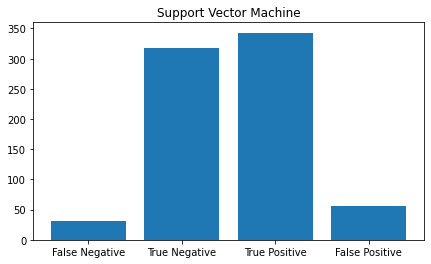

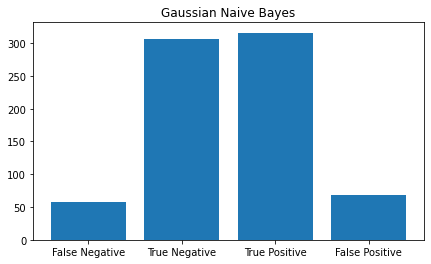

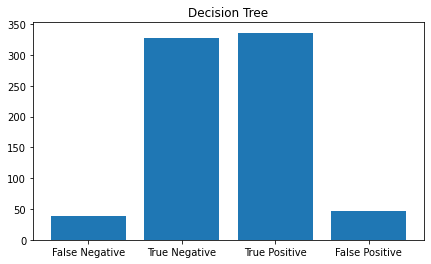

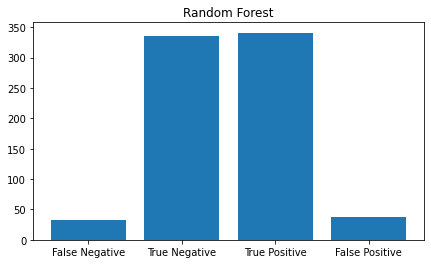

In [115]:
fig = plt.figure(figsize=(7,4))
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[SVM_FN,SVM_TN,SVM_TP,SVM_FP])
plt.title('Support Vector Machine')
plt.show()

fig = plt.figure(figsize=(7,4))
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[NB_FN,NB_TN,NB_TP,NB_FP])
plt.title('Gaussian Naive Bayes')
plt.show()

fig = plt.figure(figsize=(7,4))
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[DT_FN,DT_TN,DT_TP,DT_FP])
plt.title('Decision Tree')
plt.show()

fig = plt.figure(figsize=(7,4))
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[RF_FN,RF_TN,RF_TP,RF_FP])
plt.title('Random Forest')
plt.show()

Text(0.5, 1.0, 'Random Forest')

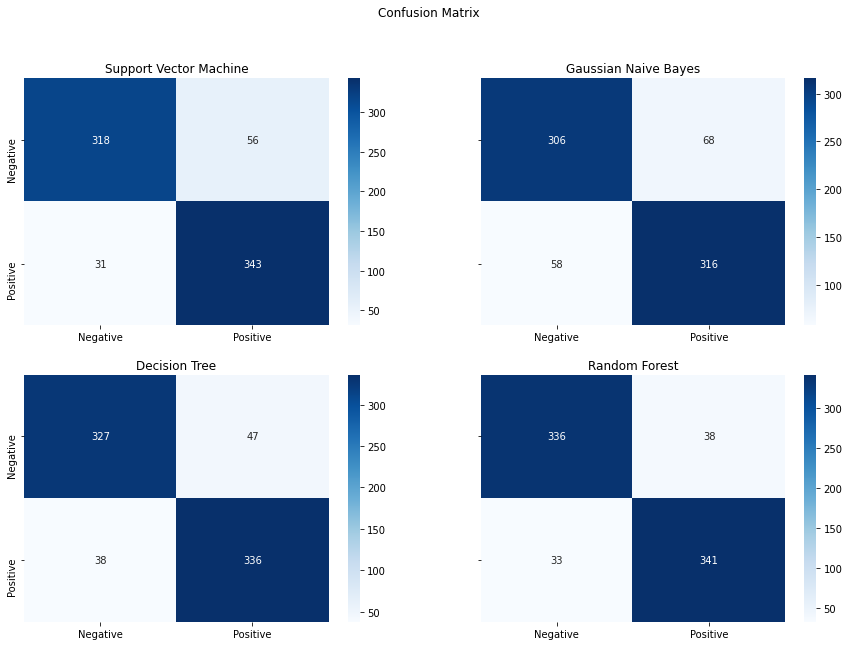

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Confusion Matrix')
plt.ylabel("Label")
plt.xlabel("Predicted")
sns.heatmap(svm_confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'], cmap='Blues', fmt='g', ax=axes[0, 0])
axes[0,0].set_title('Support Vector Machine')

sns.heatmap(nb_confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'], cmap='Blues', fmt='g', ax=axes[0, 1])
axes[0,1].set_title('Gaussian Naive Bayes')
print()
sns.heatmap(dt_confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'], cmap='Blues', fmt='g', ax=axes[1, 0])
axes[1,0].set_title('Decision Tree')

sns.heatmap(rf_confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'], cmap='Blues', fmt='g', ax=axes[1, 1])
axes[1,1].set_title('Random Forest')

Understanding:
* Random Forest Model were chosen after comparing to other models, it is conlcuded that Random Forest has the highest score in accuracy, precision, and F1 compared to the other model.

### Validation

#### ROC AUC

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [117]:
y_score = rf.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [118]:
cm_test = confusion_matrix(rf_y_test_pred, y_test)
cm_train = confusion_matrix(rf_y_train_pred, y_train)

In [119]:
Cross_validated_ROC_AUC = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc').mean()
ROC_AUC = roc_auc_score(y_test, rf_y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

 
Cross validated : 0.9672
ROC Score : 0.9051


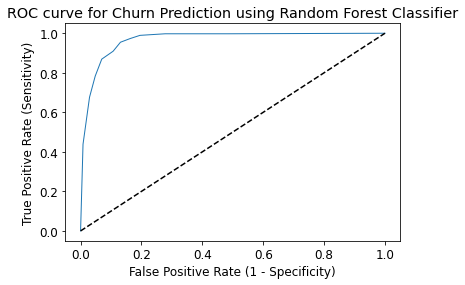

In [134]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Churn Prediction using Random Forest Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print(' ')
print('Cross validated : {:.4f}'.format(Cross_validated_ROC_AUC))
print('ROC Score : {:.4f}'.format(ROC_AUC))
plt.show()

Understanding:
* ROC scores for Random Forest model are similar to the score of accuracy, recall, precision, and f1 that conclude the model are a good model

## Conclusion
* Some column were excluded for modelling since some of it can disrupt the model.
* The best model for prediction in this case are Random Forest Classifier.